In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
#Load data
Data=pd.read_csv('/content/Weather Training Data.csv')
Data.head(-10)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99501,Row101806,Uluru,4.9,20.7,0.0,NaN,NaN,E,37.0,ESE,...,38.0,11.0,1027.1,1023.9,NaN,NaN,10.3,19.8,No,0
99502,Row101807,Uluru,1.2,20.8,0.0,NaN,NaN,E,43.0,ESE,...,29.0,6.0,1029.8,1025.9,NaN,NaN,7.9,19.9,No,0
99503,Row101808,Uluru,0.5,21.7,0.0,NaN,NaN,E,43.0,ESE,...,27.0,19.0,1029.0,1025.0,NaN,NaN,9.5,20.5,No,0
99504,Row101809,Uluru,4.0,20.0,0.0,NaN,NaN,SE,39.0,ESE,...,58.0,26.0,1030.2,1026.7,NaN,NaN,9.1,19.0,No,0


In [ ]:
#Shape
Shape=Data.shape
print('\nDataFrame Shape :', Shape)
print('\nNumber of rows :', Shape[0])
print('\nNumber of columns :', Shape[1])


DataFrame Shape : (99516, 23)

Number of rows : 99516

Number of columns : 23


In [ ]:
#Check null
Data.isnull().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [ ]:
#remove null
Data2 = Data.dropna()

In [ ]:
#Check null again
Data2.isnull().sum()

row ID           0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
#Data after removing null values
Data2.head(-10)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4183,Row4262,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0
4185,Row4264,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,0
4186,Row4265,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,0
4187,Row4266,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,...,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,0
4188,Row4267,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,...,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97396,Row99647,Darwin,22.7,31.6,0.0,7.0,7.4,ESE,43.0,SE,...,42.0,37.0,1015.5,1011.4,7.0,7.0,24.0,30.9,No,0
97397,Row99648,Darwin,22.4,31.4,0.0,6.6,8.3,E,43.0,ESE,...,59.0,40.0,1013.9,1010.4,6.0,7.0,25.8,30.8,No,0
97398,Row99649,Darwin,23.3,32.4,0.0,5.4,8.9,E,43.0,E,...,66.0,32.0,1014.5,1011.1,3.0,3.0,25.6,32.1,No,0
97399,Row99650,Darwin,20.6,31.8,0.0,6.4,10.8,E,46.0,SE,...,45.0,26.0,1016.1,1012.6,1.0,1.0,24.2,31.0,No,0


In [ ]:
#Shape
Shape=Data2.shape
print('\nDataFrame Shape :', Shape)
print('\nNumber of rows :', Shape[0])
print('\nNumber of columns :', Shape[1])


DataFrame Shape : (39574, 23)

Number of rows : 39574

Number of columns : 23


In [ ]:
#Drop all the unuseful columns
Updated_data=Data2.drop(['row ID'],axis=1)
Updated_data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4183,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0
4185,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,WNW,...,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,0
4186,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,SSE,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,0
4187,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,S,...,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,0
4188,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,WSW,...,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97406,Darwin,21.9,33.0,0.0,5.2,10.9,E,44.0,SE,ENE,...,43.0,28.0,1014.6,1010.6,1.0,1.0,25.1,32.7,No,0
97407,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0
97408,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0
97409,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0


In [ ]:
# Check the data type of each column
Updated_data.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow       int64
dtype: object

In [ ]:
#Convert columns (object) to integer
from sklearn.preprocessing import LabelEncoder
objects = Updated_data.select_dtypes(include = "object").columns
for i in range(len(objects)):
    Updated_data[objects[i]] = LabelEncoder().fit_transform(Updated_data[objects[i]])


In [ ]:
# Check data
Updated_data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4183,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
4185,4,27.1,36.1,0.0,13.0,0.0,3,43.0,3,14,...,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,0,0
4186,4,23.3,34.0,0.0,9.8,12.6,11,41.0,8,10,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,0,0
4187,4,16.1,34.2,0.0,14.6,13.2,9,37.0,9,8,...,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,0,0
4188,4,19.0,35.5,0.0,12.0,12.3,1,48.0,1,15,...,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97406,6,21.9,33.0,0.0,5.2,10.9,0,44.0,9,1,...,43.0,28.0,1014.6,1010.6,1.0,1.0,25.1,32.7,0,0
97407,6,19.3,33.4,0.0,6.0,11.0,1,35.0,9,4,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
97408,6,21.2,32.6,0.0,7.6,8.6,0,37.0,9,9,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
97409,6,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0


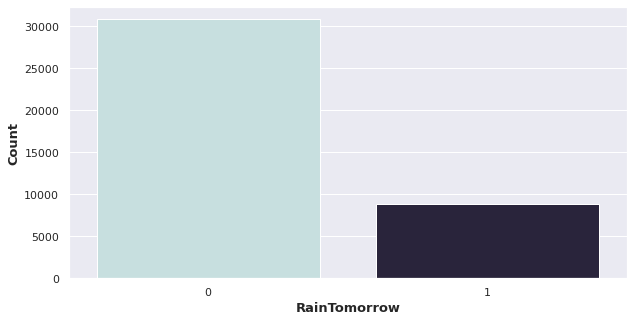

In [ ]:
#Visualization of column (Rain Tomorrow)
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'RainTomorrow',data = Updated_data,palette="ch:start=.2,rot=-.3")
plt.xlabel("RainTomorrow",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

In [ ]:
# As shown it's unbalanced data
from collections import Counter
print("Count : ",Counter(Updated_data.RainTomorrow))

Count :  Counter({0: 30772, 1: 8802})


In [ ]:
#Over Sampling
from sklearn.utils import resample
No_rain = Updated_data[(Updated_data['RainTomorrow']==0.0)]
rain = Updated_data[(Updated_data['RainTomorrow']==1.0)]
minority = resample(rain,replace=True,n_samples= 30772)
final_data = pd.concat([minority, No_rain])


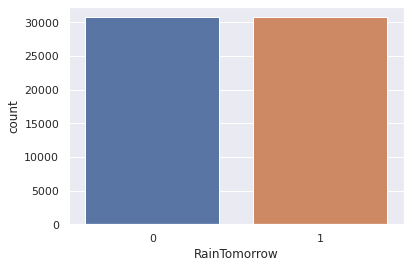

In [ ]:
#Visualization of Rain Tomorrow after over sampling
sns.countplot(x=final_data['RainTomorrow'])

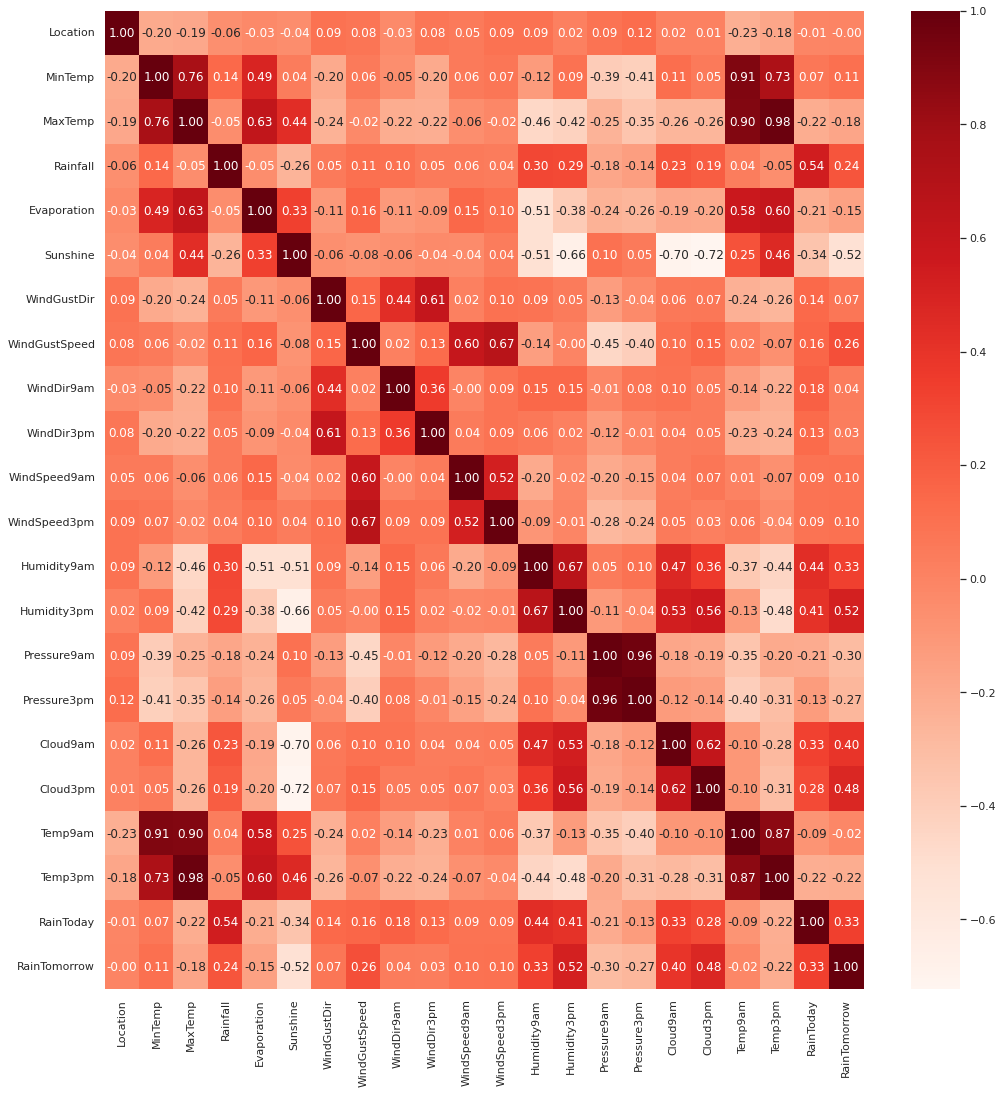

In [ ]:
#Check the correlation between features
plt.figure(figsize=(17,18))
correlation = final_data.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds,fmt='.2f')

In [ ]:
# Remove High corelation
final_data=final_data.drop(['Temp9am','Temp3pm','Humidity9am'],axis=1)

In [ ]:
#New data after removing some features
final_data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
64135,21,20.5,29.6,0.0,10.0,6.2,0,50.0,2,0,22.0,31.0,59.0,1019.0,1015.5,4.0,7.0,0,1
46171,8,14.1,20.3,1.4,3.8,4.3,12,41.0,13,8,9.0,26.0,61.0,1006.3,1005.7,7.0,7.0,1,1
51428,17,8.3,13.0,0.0,2.2,2.6,0,43.0,0,0,15.0,17.0,73.0,1021.0,1014.1,7.0,8.0,0,1
4508,4,17.7,28.1,10.2,0.2,4.5,7,44.0,3,7,17.0,15.0,66.0,1013.8,1012.1,7.0,7.0,1,1
90630,7,17.5,36.0,0.0,13.4,13.1,7,63.0,6,3,28.0,33.0,18.0,1008.6,1002.4,0.0,6.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97406,6,21.9,33.0,0.0,5.2,10.9,0,44.0,9,1,15.0,19.0,28.0,1014.6,1010.6,1.0,1.0,0,0
97407,6,19.3,33.4,0.0,6.0,11.0,1,35.0,9,4,9.0,20.0,32.0,1013.9,1010.5,0.0,1.0,0,0
97408,6,21.2,32.6,0.0,7.6,8.6,0,37.0,9,9,13.0,11.0,28.0,1014.6,1011.2,7.0,0.0,0,0
97409,6,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,17.0,11.0,23.0,1015.3,1011.8,0.0,0.0,0,0


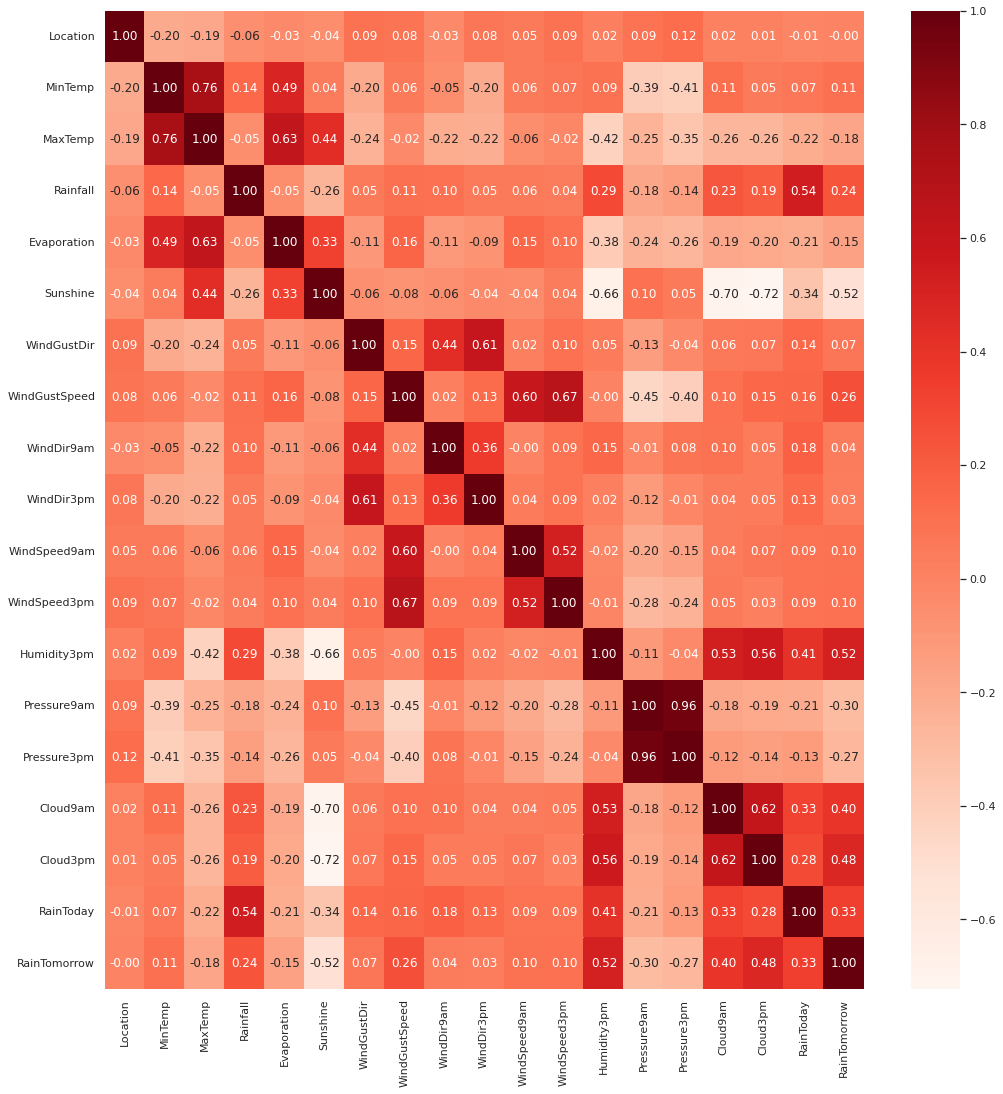

In [ ]:
#Check the correlation between features
plt.figure(figsize=(17,18))
correlation = final_data.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds,fmt='.2f')

In [ ]:
#Remove some feature
final_data=final_data.drop(['Cloud9am','WindSpeed3pm','WindSpeed9am','Pressure9am'],axis=1)

KeyError: ignored

In [ ]:
#Show data
final_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,Cloud3pm,RainToday,RainTomorrow
64135,21,20.5,29.6,0.0,10.0,6.2,0,50.0,2,0,59.0,1015.5,7.0,0,1
46171,8,14.1,20.3,1.4,3.8,4.3,12,41.0,13,8,61.0,1005.7,7.0,1,1
51428,17,8.3,13.0,0.0,2.2,2.6,0,43.0,0,0,73.0,1014.1,8.0,0,1
4508,4,17.7,28.1,10.2,0.2,4.5,7,44.0,3,7,66.0,1012.1,7.0,1,1
90630,7,17.5,36.0,0.0,13.4,13.1,7,63.0,6,3,18.0,1002.4,6.0,0,1


Lower bound:  -6.099999999999996
Upper bound:  33.89999999999999


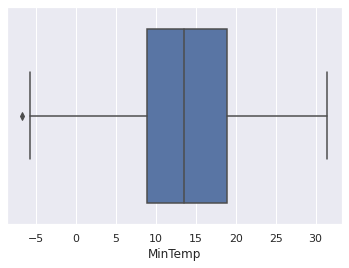

In [ ]:
# BoxPlot for MaxTemp and MinTemp to check outliners
import seaborn as sns
sns.boxplot(x=final_data['MinTemp'])
q1 = final_data['MinTemp'].quantile(0.25)
q3 = final_data['MinTemp'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)

Lower bound:  1.3499999999999979
Upper bound:  45.75


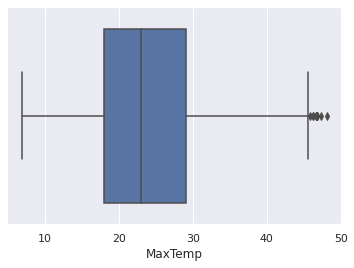

In [ ]:
# BoxPlot for MaxTemp and MinTemp to check outliners
import seaborn as sns
sns.boxplot(x=final_data['MaxTemp'])
q1 = final_data['MaxTemp'].quantile(0.25)
q3 = final_data['MaxTemp'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)

In [ ]:
#Defining X and Y
Y=final_data['RainTomorrow']
X=final_data.drop(['Location','RainTomorrow'],axis=1)
print("X columns are: ",X.columns)
print("number of X columns : ", len(X.columns))

X columns are:  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'RainToday'],
      dtype='object')
number of X columns :  13


In [ ]:
# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(49235, 13)
(12309, 13)
(49235,)
(12309,)


In [ ]:
#Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.38582677, 0.41439206, 0.        , ..., 0.68866328, 0.55555556,
        0.        ],
       [0.70866142, 0.57320099, 0.        , ..., 0.58883249, 0.33333333,
        0.        ],
       [0.34120735, 0.24069479, 0.        , ..., 0.76988156, 0.55555556,
        0.        ],
       ...,
       [0.5984252 , 0.30521092, 0.04918033, ..., 0.53130288, 0.88888889,
        1.        ],
       [0.40419948, 0.13895782, 0.        , ..., 0.25211506, 0.88888889,
        0.        ],
       [0.43307087, 0.24813896, 0.02622951, ..., 0.642978  , 0.33333333,
        1.        ]])

# **Random Forest**

In [ ]:
#Build Random forest model
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier(n_estimators=200) #the number of trees in the forest.
Random.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
#Future importance of the columns
importances = Random.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = final_data.columns[1:]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Sunshine                       0.174956
 2) Humidity3pm                    0.171547
 3) Pressure3pm                    0.105745
 4) Cloud3pm                       0.082236
 5) WindGustSpeed                  0.075179
 6) MinTemp                        0.067781
 7) MaxTemp                        0.066874
 8) Evaporation                    0.057215
 9) Rainfall                       0.053875
10) WindDir9am                     0.041066
11) WindDir3pm                     0.040697
12) WindGustDir                    0.039480
13) RainToday                      0.023348


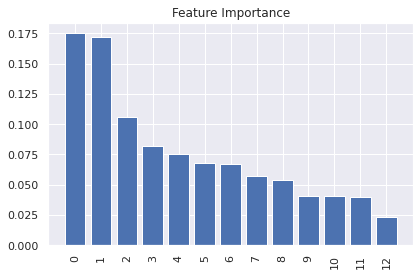

In [ ]:
#Plot (future importance)
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#predict
y_pred2=Random.predict(X_test)
y_pred2

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
#Accuracy of the model
from sklearn import metrics
accuracy_random_forest=metrics.accuracy_score(Y_test, y_pred2)
print("Accuracy: %",accuracy_random_forest *100)

Accuracy: % 94.82492485173451


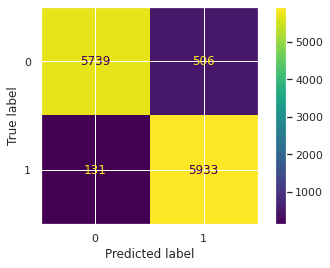

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(Y_test, y_pred2)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred2)
plt.show()

# Decision Tree Model

In [ ]:
#Build decision tree Model
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion="gini",random_state=42)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

 1) Sunshine                       0.292505
 2) Humidity3pm                    0.156547
 3) Pressure3pm                    0.121660
 4) WindGustSpeed                  0.068752
 5) MinTemp                        0.066630
 6) MaxTemp                        0.061204
 7) Evaporation                    0.058841
 8) WindDir9am                     0.037918
 9) WindDir3pm                     0.037765
10) Rainfall                       0.034149
11) WindGustDir                    0.031496
12) Cloud3pm                       0.030650
13) RainToday                      0.001883


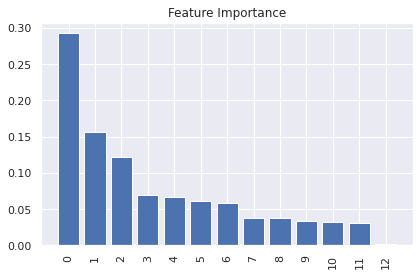

In [ ]:
#Future importance
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = final_data.columns[1:]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

#Plot
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Predict
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
#Accuracy of the model
print("Accuracy: %",metrics.accuracy_score(Y_test, y_pred)*100)

Accuracy: % 91.1609391502153


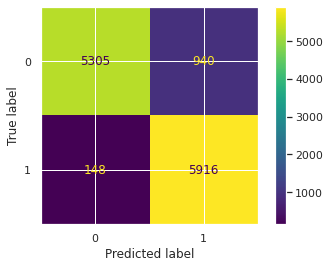

In [ ]:
#Evaluate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(Y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

# **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 100)
test=classifier.fit(X_train,Y_train)

In [ ]:
y_pred4 = classifier.predict(X_test)
y_pred4

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(Y_test, y_pred4)
print(f"Accuracy score: % {acc1*100}")

Accuracy score: % 79.35656836461126


# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
fit=gnb.fit(X_train,Y_train)
Y_pred3=gnb.predict(X_test)
Y_pred3

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(Y_test, Y_pred3)
print(f"Accuracy score: % {acc1*100}")

Accuracy score: % 76.54561702819076


# **Neural Network**

In [ ]:
#model
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Define layers
model=Sequential()
model.add(Dense(25,input_dim=13,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#Compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#fit model
model.fit(X_train,Y_train,epochs=150,batch_size=20)

Epoch 1/150
2462/2462 [==============================] - 4s 1ms/step - loss: 0.4655 - accuracy: 0.7769
Epoch 2/150
2462/2462 [==============================] - 4s 1ms/step - loss: 0.4407 - accuracy: 0.7923
Epoch 3/150
2462/2462 [==============================] - 4s 2ms/step - loss: 0.4378 - accuracy: 0.7948
Epoch 4/150
2462/2462 [==============================] - 4s 1ms/step - loss: 0.4362 - accuracy: 0.7939
Epoch 5/150
2462/2462 [==============================] - 3s 1ms/step - loss: 0.4347 - accuracy: 0.7942
Epoch 6/150
2462/2462 [==============================] - 4s 1ms/step - loss: 0.4332 - accuracy: 0.7951
Epoch 7/150
2462/2462 [==============================] - 3s 1ms/step - loss: 0.4322 - accuracy: 0.7968
Epoch 8/150
2462/2462 [==============================] - 3s 1ms/step - loss: 0.4321 - accuracy: 0.7957
Epoch 9/150
2462/2462 [==============================] - 3s 1ms/step - loss: 0.4307 - accuracy: 0.7970
Epoch 10/150
2462/2462 [==============================] - 4s 1ms/step - l

In [ ]:
accuracy=model.evaluate(X_train,Y_train)
print('Accuracy: ',accuracy)

1539/1539 [==============================] - 2s 1ms/step - loss: 0.3768 - accuracy: 0.8255
Accuracy:  [0.3768385946750641, 0.8255306482315063]


# **Compare between models**

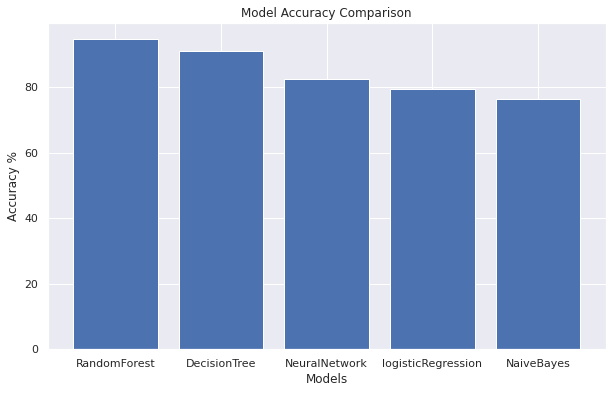

In [ ]:
import matplotlib.pyplot as plt

# Create a list of model names
models = ['RandomForest', 'DecisionTree','NeuralNetwork','logisticRegression','NaiveBayes']

# Create a list of model accuracy scores
accuracies = [94.82492485173451, 91.16029084409781,82.55306482315063,79.35656836461126,76.54561702819076]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)

# Add axis labels and a title
plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.title('Model Accuracy Comparison')

# Display the chart
plt.show()




